In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import decomposition, datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib as mpl
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import math
from wordcloud import WordCloud
import plotly.graph_objs as go
import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

df15 = pd.read_csv("./Dataset/2015.csv")
df16 = pd.read_csv("./Dataset/2016.csv")
df17 = pd.read_csv("./Dataset/2017.csv")
df18 = pd.read_csv("./Dataset/2018.csv")
df19 = pd.read_csv("./Dataset/2019.csv")

In [2]:
df15.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
df16.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [4]:
df17.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [5]:
df18.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [6]:
df19.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [7]:
print("2015\n")
print("Shape",df15.shape)
print("\nDuplicate",df15.duplicated().sum())
print("\nNA values")
print(df15.isna().sum())
print("\nNULL Vales")
print(df15.isnull().sum())
print("\n")
print(df15.describe())

2015

Shape (158, 12)

Duplicate 0

NA values
Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

NULL Vales
Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64


       Happiness Rank  Happiness Score  Standard Error  \
count      158.0

In [8]:
print("2016\n")
print("Shape",df16.shape)
print("\nDuplicate",df16.duplicated().sum())
print("\nNA values")
print(df16.isna().sum())
print("\nNULL Vales")
print(df16.isnull().sum())
print("\n")
print(df16.describe())

2016

Shape (157, 13)

Duplicate 0

NA values
Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

NULL Vales
Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64


    

In [9]:
print("2017\n")
print("Shape",df17.shape)
print("\nDuplicate",df17.duplicated().sum())
print("\nNA values")
print(df17.isna().sum())
print("\nNULL Vales")
print(df17.isnull().sum())
print("\n")
print(df17.describe())

2017

Shape (155, 12)

Duplicate 0

NA values
Country                          0
Happiness.Rank                   0
Happiness.Score                  0
Whisker.high                     0
Whisker.low                      0
Economy..GDP.per.Capita.         0
Family                           0
Health..Life.Expectancy.         0
Freedom                          0
Generosity                       0
Trust..Government.Corruption.    0
Dystopia.Residual                0
dtype: int64

NULL Vales
Country                          0
Happiness.Rank                   0
Happiness.Score                  0
Whisker.high                     0
Whisker.low                      0
Economy..GDP.per.Capita.         0
Family                           0
Health..Life.Expectancy.         0
Freedom                          0
Generosity                       0
Trust..Government.Corruption.    0
Dystopia.Residual                0
dtype: int64


       Happiness.Rank  Happiness.Score  Whisker.high  Whisker.low  \
count

In [10]:
print("2018\n")
print("Shape",df18.shape)
print("\nDuplicate",df18.duplicated().sum())
print("\nNA values")
print(df18.isna().sum())
print("\nNULL Vales")
print(df18.isnull().sum())
print("\n")
print(df18.describe())

2018

Shape (156, 9)

Duplicate 0

NA values
Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       1
dtype: int64

NULL Vales
Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       1
dtype: int64


       Overall rank       Score  GDP per capita  Social support  \
count    156.000000  156.000000      156.000000      156.000000   
mean      78.500000    5.375917        0.891449        1.213237   
std       45.177428    1.119506        0.391921        0.302372   
min        1.000000    2.905000    

In [11]:
print("2019\n")
print("Shape",df19.shape)
print("\nDuplicate",df19.duplicated().sum())
print("\nNA values")
print(df19.isna().sum())
print("\nNULL Vales")
print(df19.isnull().sum())
print("\n")
print(df19.describe())

2019

Shape (156, 9)

Duplicate 0

NA values
Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

NULL Vales
Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64


       Overall rank       Score  GDP per capita  Social support  \
count    156.000000  156.000000      156.000000      156.000000   
mean      78.500000    5.407096        0.905147        1.208814   
std       45.177428    1.113120        0.398389        0.299191   
min        1.000000    2.853000    

Our data seems pretty much clean. Additionally, there are no missing values in our dataset, therefore we move on to our visualization and analysis of dataset after checking for outliers

# Exploratory Data Analysis for 2017

# Removing Outliers

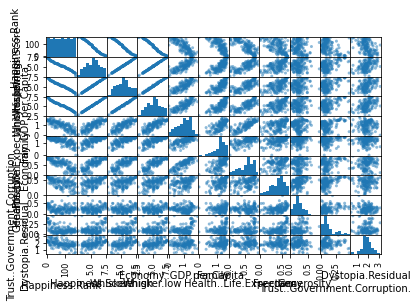

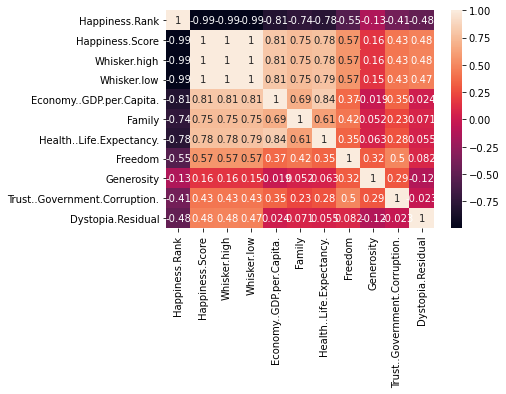

In [12]:
pd.plotting.scatter_matrix(df17)
plt.show()
df17.corr()
sns.heatmap(df17.corr(),annot=True)
plt.show()

<Figure size 432x288 with 0 Axes>

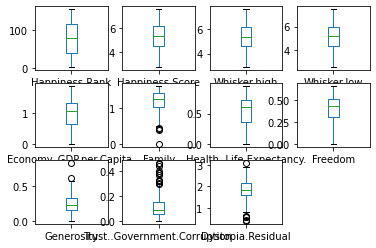

In [13]:
plt.clf()
df17.plot(kind='box',subplots=True,layout=(3,4),sharex =False,sharey=False)
plt.show()

There were some outliers which were removed with the help of IQR and boxplot

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')


[]

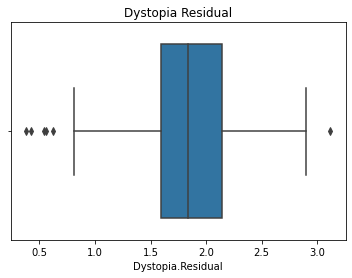

In [14]:
print(df17.columns)
plt.title("Dystopia Residual")
sns.boxplot(x=df17['Dystopia.Residual'])
plt.plot()

In [15]:
print(df17.shape)
q1 = df17['Dystopia.Residual'].quantile(0.25)
q3 = df17['Dystopia.Residual'].quantile(0.75)
IQR = q3-q1
ll = q1-1.5*IQR
ul  =q3+1.5*IQR

(155, 12)


In [16]:
df17.drop(df17[df17['Dystopia.Residual'] < ll].index, inplace = True)
df17.drop(df17[df17['Dystopia.Residual'] > ul].index, inplace = True)
print(df17.shape)

(149, 12)


Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')


[]

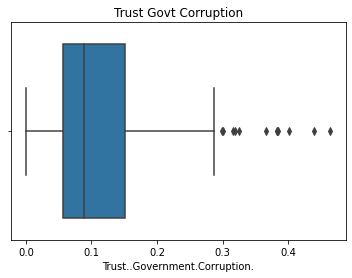

In [17]:
print(df17.columns)
plt.title("Trust Govt Corruption")
sns.boxplot(x=df17['Trust..Government.Corruption.'])
plt.plot()

In [18]:
print(df17.shape)
q1 = df17['Trust..Government.Corruption.'].quantile(0.25)
q3 = df17['Trust..Government.Corruption.'].quantile(0.75)
IQR = q3-q1
ll = q1-1.5*IQR
ul  =q3+1.5*IQR

(149, 12)


In [19]:
df17.drop(df17[df17['Trust..Government.Corruption.'] < ll].index, inplace = True)
df17.drop(df17[df17['Trust..Government.Corruption.'] > ul].index, inplace = True)
print(df17.shape)

(137, 12)


In [20]:
print(df17.shape)
q1 = df17['Trust..Government.Corruption.'].quantile(0.25)
q3 = df17['Trust..Government.Corruption.'].quantile(0.75)
IQR = q3-q1
ll = q1-1.5*IQR
ul  =q3+1.5*IQR

(137, 12)


In [21]:
df17.drop(df17[df17['Trust..Government.Corruption.'] < ll].index, inplace = True)
df17.drop(df17[df17['Trust..Government.Corruption.'] > ul].index, inplace = True)
print(df17.shape)

(127, 12)


<Figure size 432x288 with 0 Axes>

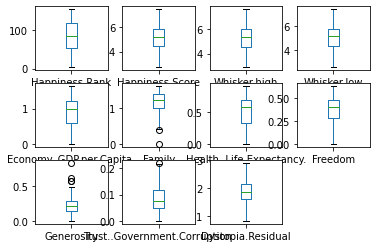

In [22]:
plt.clf()
df17.plot(kind='box',subplots=True,layout=(3,4),sharex =False,sharey=False)
plt.show()

In [23]:
df17.drop(['Whisker.high','Whisker.low','Happiness.Rank'], axis = 1,inplace=True)
df17 = df17.reset_index()
keys = list(range(1,df17.shape[0]+1))
df17['Happiness.Rank'] = keys
df17.drop(['index'], axis = 1,inplace=True)

We are dropping columns which are not required for further analysis

# Visualization

[]

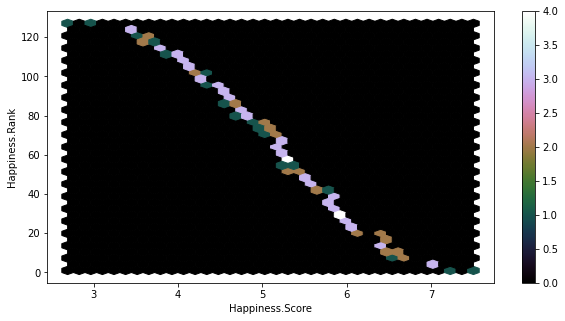

In [24]:
df17.plot(y= 'Happiness.Rank', x ='Happiness.Score',kind='hexbin',gridsize=35, sharex=False, colormap='cubehelix',figsize=(10,5))
plt.plot()

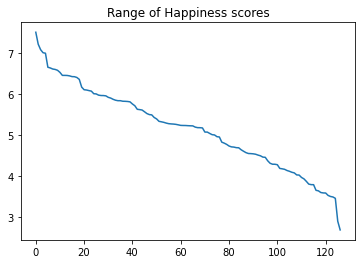

In [25]:

plt.title('Range of Happiness scores')
plt.plot(df17['Happiness.Score'])

Here we can see that the Happiness scores range between 7.76 to 2.85

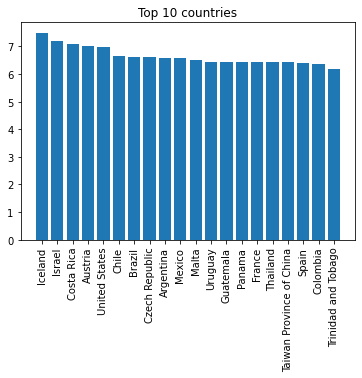

In [26]:
df = df17.head(20)
plt.clf()
plt.title("Top 10 countries")
plt.xticks(rotation=90)
plt.bar(df['Country'],df['Happiness.Score'])
plt.show()

The top 10 and bottom 10 countries are listed based on their happiness index via bar-graph

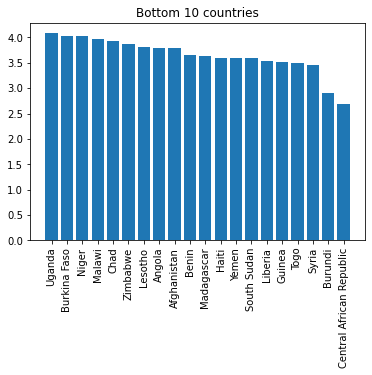

In [27]:
df = df17.tail(20)
plt.clf()
plt.title('Bottom 10 countries')
plt.xticks(rotation=90)
plt.bar(df['Country'],df['Happiness.Score'])
plt.show()

In [28]:
df17.describe()

,Happiness.Score,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Happiness.Rank
count,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000
mean,5.158472,0.911991,1.154908,0.520135,0.376307,0.228598,0.084900,1.881589,64.000000
std,0.993447,0.382681,0.284232,0.232134,0.142060,0.131570,0.048542,0.445237,36.805797
min,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.814382,1.000000
25%,4.462500,0.602407,1.000329,0.326851,0.285313,0.144188,0.047905,1.605148,32.500000
50%,5.230000,0.991012,1.214009,0.579251,0.408158,0.210557,0.076047,1.835011,64.000000
75%,5.887000,1.217622,1.384467,0.691450,0.475897,0.284580,0.116127,2.144654,95.500000
max,7.504000,1.632952,1.610574,0.913476,0.633376,0.838075,0.221060,2.898639,127.000000


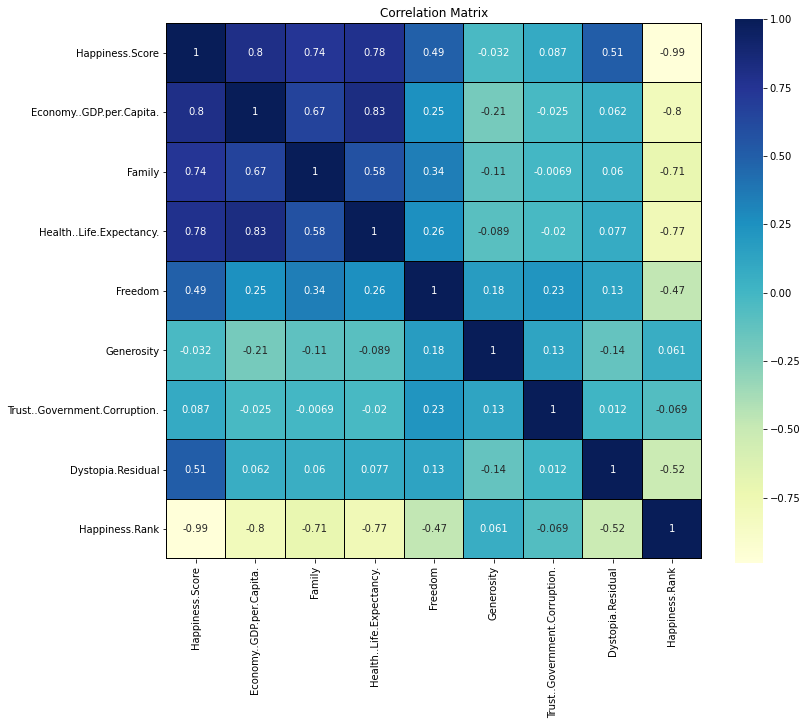

In [29]:
f, ax = plt.subplots(figsize=(12, 10))
plt.title('Correlation Matrix')
sns.heatmap(df17.corr(),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True)

From the above correlation matrix we can get to know how excatly different factors are correlated

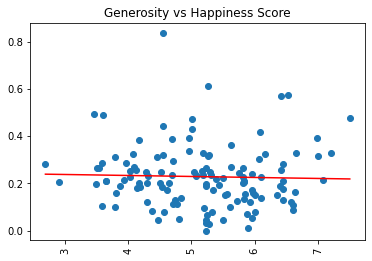

In [30]:
plt.clf()
x = df17['Happiness.Score']
y = df17['Generosity']
plt.title('Generosity vs Happiness Score')
plt.xticks(rotation=90)
m, b = np. polyfit(x, y, 1) 
plt.scatter(x,y)
plt. plot(x, m*x + b,color = 'red') 
plt.show()

We can conclude that Generosity is weakly correlated to happiness index

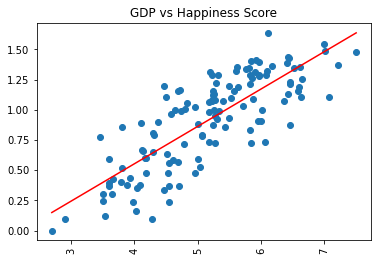

In [31]:
plt.clf()
x = df17['Happiness.Score']
y = df17['Economy..GDP.per.Capita.']
plt.title('GDP vs Happiness Score')
plt.xticks(rotation=90)
m, b = np. polyfit(x, y, 1) 
plt.scatter(x,y)
plt. plot(x, m*x + b,color = 'red') 
plt.show()

We can conclude that GDP is highly positively correlated to happiness index. So with the increase in GDP per capity, people are more happy in the country.
And therefore it indicates better standard of living.

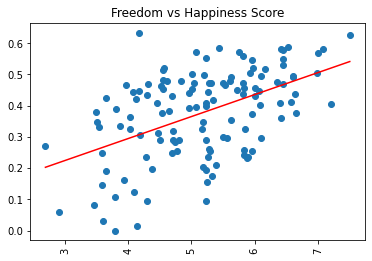

In [32]:
plt.clf()
x = df17['Happiness.Score']
y = df17['Freedom']
plt.title('Freedom vs Happiness Score')
plt.xticks(rotation=90)
m, b = np. polyfit(x, y, 1) 
plt.scatter(x,y)
plt. plot(x, m*x + b,color = 'red') 
plt.show()

From the above scatter plot we can conclude that freedom has a major contribution to extent of happiness

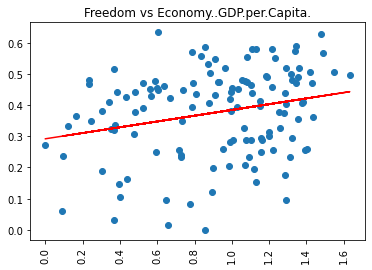

In [33]:
plt.clf()
x = df17['Economy..GDP.per.Capita.']
y = df17['Freedom']
plt.title('Freedom vs Economy..GDP.per.Capita.')
plt.xticks(rotation=90)
m, b = np. polyfit(x, y, 1) 
plt.scatter(x,y)
plt. plot(x, m*x + b,color = 'red') 
plt.show()

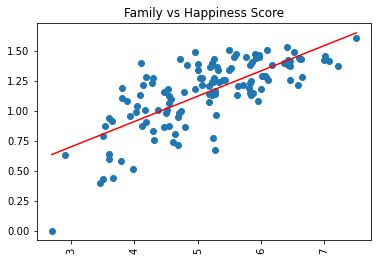

In [34]:
plt.clf()
x = df17['Happiness.Score']
y = df17['Family']
plt.title('Family vs Happiness Score')
plt.xticks(rotation=90)
m, b = np. polyfit(x, y, 1) 
plt.scatter(x,y)
plt. plot(x, m*x + b,color = 'red') 
plt.show()

Social support and social interactions also highly effect happiness index. Therefore we can see that Family and Happiness are positively correlated.

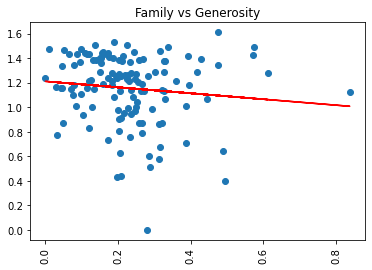

In [35]:
plt.clf()
x = df17['Generosity']
y = df17['Family']
plt.title('Family vs Generosity')
plt.xticks(rotation=90)
m, b = np. polyfit(x, y, 1) 
plt.scatter(x,y)
plt. plot(x, m*x + b,color = 'red') 
plt.show()

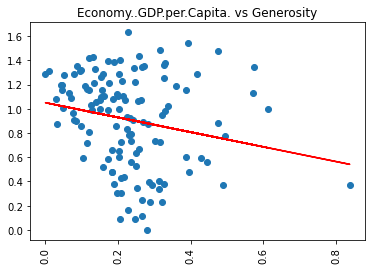

In [36]:
plt.clf()
x = df17['Generosity']
y = df17['Economy..GDP.per.Capita.']
plt.title('Economy..GDP.per.Capita. vs Generosity')
plt.xticks(rotation=90)
m, b = np. polyfit(x, y, 1) 
plt.scatter(x,y)
plt. plot(x, m*x + b,color = 'red') 
plt.show()

Here we observe a negetive correlation between these parameters mentioned above which implies as the GDP/standard of living increases, the sense of generosity and charity decreases as most of the population are stable in their life

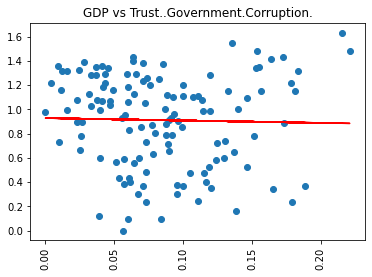

In [37]:
plt.clf()
x = df17['Trust..Government.Corruption.']
y = df17['Economy..GDP.per.Capita.']
plt.title('GDP vs Trust..Government.Corruption.')
plt.xticks(rotation=90)
m, b = np. polyfit(x, y, 1) 
plt.scatter(x,y)
plt. plot(x, m*x + b,color = 'red') 
plt.show()

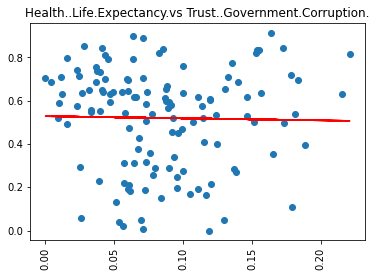

In [38]:
plt.clf()
x = df17['Trust..Government.Corruption.']
y = df17['Health..Life.Expectancy.']
plt.title('Health..Life.Expectancy.vs Trust..Government.Corruption.')
plt.xticks(rotation=90)
m, b = np. polyfit(x, y, 1) 
plt.scatter(x,y)
plt. plot(x, m*x + b,color = 'red') 
plt.show()

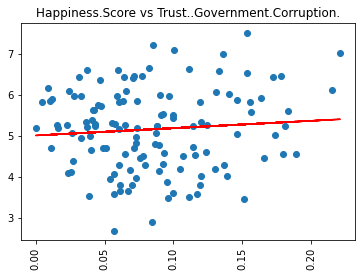

In [39]:
plt.clf()
x = df17['Trust..Government.Corruption.']
y = df17['Happiness.Score']
plt.title('Happiness.Score vs Trust..Government.Corruption.')
plt.xticks(rotation=90)
m, b = np. polyfit(x, y, 1) 
plt.scatter(x,y)
plt. plot(x, m*x + b,color = 'red') 
plt.show()

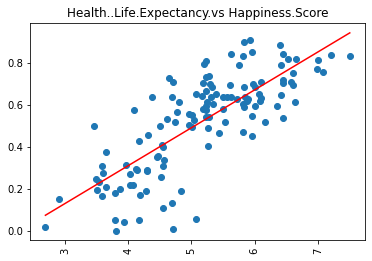

In [40]:
plt.clf()
x = df17['Happiness.Score']
y = df17['Health..Life.Expectancy.']
plt.title('Health..Life.Expectancy.vs Happiness.Score')
plt.xticks(rotation=90)
m, b = np. polyfit(x, y, 1) 
plt.scatter(x,y)
plt. plot(x, m*x + b,color = 'red') 
plt.show()

We can conclude that Happiness to positively correlated to Life expectency. People are more happy in the countries with higher life expectency

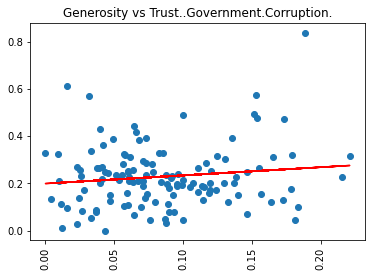

In [41]:
plt.clf()
x = df17['Trust..Government.Corruption.']
y = df17['Generosity']
plt.title('Generosity vs Trust..Government.Corruption.')
plt.xticks(rotation=90)
m, b = np. polyfit(x, y, 1) 
plt.scatter(x,y)
plt. plot(x, m*x + b,color = 'red') 
plt.show()

In [42]:
df.columns

Index(['Country', 'Happiness.Score', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual', 'Happiness.Rank'],
      dtype='object')

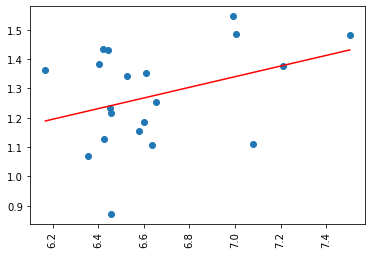

In [43]:
df = df17.head(20)
x = df['Happiness.Score']
y = df['Economy..GDP.per.Capita.']
plt.xticks(rotation=90)
m, b = np. polyfit(x, y, 1) 
plt.scatter(x,y)
plt. plot(x, m*x + b,color = 'red') 
plt.show()

In [44]:
df.head(20)

,Country,Happiness.Score,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Happiness.Rank
0,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,1
1,Israel,7.213,1.375382,1.376290,0.838404,0.405989,0.330083,0.085242,2.801757,2
2,Costa Rica,7.079,1.109706,1.416404,0.759509,0.580132,0.214613,0.100107,2.898639,3
3,Austria,7.006,1.487097,1.459945,0.815328,0.567766,0.316472,0.221060,2.138506,4
4,United States,6.993,1.546259,1.419921,0.774287,0.505741,0.392579,0.135639,2.218113,5
5,Chile,6.652,1.252785,1.284025,0.819480,0.376895,0.326662,0.082288,2.509586,6
6,Brazil,6.635,1.107353,1.431306,0.616552,0.437454,0.162350,0.111093,2.769267,7
7,Czech Republic,6.609,1.352682,1.433885,0.754444,0.490946,0.088107,0.036873,2.451862,8
8,Argentina,6.599,1.185295,1.440451,0.695137,0.494519,0.109457,0.059740,2.614005,9
9,Mexico,6.578,1.153184,1.210862,0.709979,0.412730,0.120990,0.132774,2.837155,10


From  the above scatter plot we can conclude that even though country like Guatemala has low GDP and life expectency, people are happy because of high generosity and low corruption

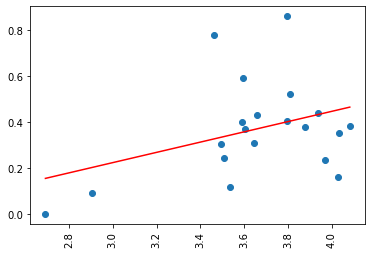

In [45]:
df = df17.tail(20)
x = df['Happiness.Score']
y = df['Economy..GDP.per.Capita.']
plt.xticks(rotation=90)
m, b = np. polyfit(x, y, 1) 
plt.scatter(x,y)
plt. plot(x, m*x + b,color = 'red') 
plt.show()

In [46]:
df.tail(20)

,Country,Happiness.Score,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Happiness.Rank
107,Uganda,4.081,0.381431,1.129828,0.217633,0.443186,0.325766,0.057070,1.526363,108
108,Burkina Faso,4.032,0.350228,1.043280,0.215844,0.324368,0.250865,0.120328,1.727213,109
109,Niger,4.028,0.161925,0.993025,0.268505,0.363659,0.228674,0.138573,1.873983,110
110,Malawi,3.970,0.233442,0.512569,0.315090,0.466915,0.287170,0.072712,2.081786,111
111,Chad,3.936,0.438013,0.953856,0.041135,0.162342,0.216114,0.053582,2.071238,112
112,Zimbabwe,3.875,0.375847,1.083096,0.196764,0.336384,0.189143,0.095375,1.597970,113
113,Lesotho,3.808,0.521021,1.190095,0.000000,0.390661,0.157497,0.119095,1.429835,114
114,Angola,3.795,0.858428,1.104412,0.049869,0.000000,0.097926,0.069720,1.614482,115
115,Afghanistan,3.794,0.401477,0.581543,0.180747,0.106180,0.311871,0.061158,2.150801,116
116,Benin,3.657,0.431085,0.435300,0.209930,0.425963,0.207948,0.060929,1.885631,117


By observing above graph and table, we can conclude that there are countries like Angola which has comparitively higher GDP per capita, but still at the bottom of the happiness score list because it has lower Trust on government and low generocity

# Working with 2019 Dataset

<Figure size 432x288 with 0 Axes>

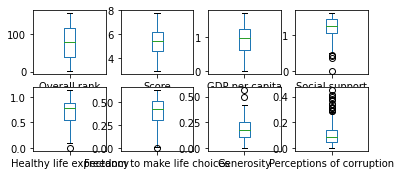

In [47]:
plt.clf()
df19.plot(kind='box',subplots=True,layout=(3,4),sharex =False,sharey=False)
plt.show()

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')


[]

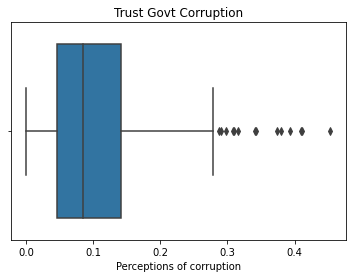

In [48]:
print(df19.columns)
plt.title("Trust Govt Corruption")
sns.boxplot(x=df19['Perceptions of corruption'])
plt.plot()

In [49]:
print(df19.shape)
q1 = df19['Perceptions of corruption'].quantile(0.25)
q3 = df19['Perceptions of corruption'].quantile(0.75)
IQR = q3-q1
ll = q1-1.5*IQR
ul  =q3+1.5*IQR

(156, 9)


In [50]:
df19.drop(df19[df19['Perceptions of corruption'] < ll].index, inplace = True)
df19.drop(df19[df19['Perceptions of corruption'] > ul].index, inplace = True)
print(df19.shape)

(142, 9)


<Figure size 432x288 with 0 Axes>

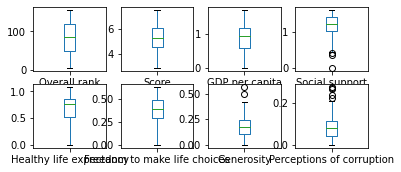

In [51]:
plt.clf()
df19.plot(kind='box',subplots=True,layout=(3,4),sharex =False,sharey=False)
plt.show()

In [52]:
df19 = df19.reset_index()
df19.drop(['Overall rank'],axis=1,inplace=True)
keys = list(range(1,df19.shape[0]+1))
df19['Overall rank'] = keys
df19.drop(['index'], axis = 1,inplace=True)

In [53]:
df19.head()

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Overall rank
0,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,1
1,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226,2
2,Costa Rica,7.167,1.034,1.441,0.963,0.558,0.144,0.093,3
3,Israel,7.139,1.276,1.455,1.029,0.371,0.261,0.082,4
4,United Kingdom,7.054,1.333,1.538,0.996,0.450,0.348,0.278,5


# Feature Extraction


/home/gb/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3666: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



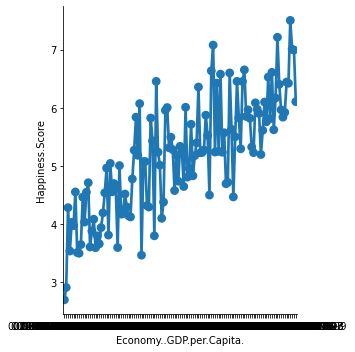

In [54]:
sns.factorplot('Economy..GDP.per.Capita.', 'Happiness.Score',data=df17)

In [55]:
X = df17.drop(['Country'],axis=1,inplace=False).values
X_std = StandardScaler().fit_transform(X)

In [56]:
mean_vec = np.mean(X_std,axis=0)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print("Eigen values")
print(eig_vals)
print("\nEigen Vectors")
print(eig_vecs)

Eigen values
[4.43475280e+00 1.37924136e+00 1.15932271e+00 8.63572939e-01
 6.34857603e-01 4.25848153e-01 5.31781983e-08 1.55177992e-02
 1.58315154e-01]

Eigen Vectors
[[-4.68062207e-01 -7.17723322e-02 -1.24570084e-01  7.10659734e-02
   8.09684606e-02  4.70201473e-02 -8.09486577e-01  2.97416446e-01
   5.20247830e-02]
 [-4.14692159e-01  2.09204156e-01  2.38938241e-01 -1.03432542e-01
   1.40796254e-01 -1.95606730e-01  3.11834272e-01  2.39836242e-01
   7.09666574e-01]
 [-3.76656510e-01  7.36693451e-02  2.28465188e-01 -2.51271535e-02
  -2.16092959e-01  8.01942829e-01  2.31595867e-01  1.24482301e-01
  -2.02321594e-01]
 [-4.00379536e-01  1.40116905e-01  2.46203105e-01 -1.07776374e-03
   2.74945052e-01 -4.39082856e-01  1.89139697e-01  1.32183147e-01
  -6.61673337e-01]
 [-2.36564053e-01 -5.07023047e-01  3.43570307e-02  7.69186047e-02
  -7.48133694e-01 -3.18875362e-01  1.15777340e-01  7.11752107e-02
  -3.51817872e-03]
 [ 5.45248251e-02 -5.86179615e-01  2.70214112e-01  6.02997709e-01
   4.2590761

In [57]:
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(key = lambda x: x[0], reverse= True)
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp) 
print(len(cum_var_exp))

9


The coverience matrix are decomposed into Eigen pairs and it is sorted in decreasing order of eigen values and contructs a projection matrix on selected Eigen vetors which is used for transformation

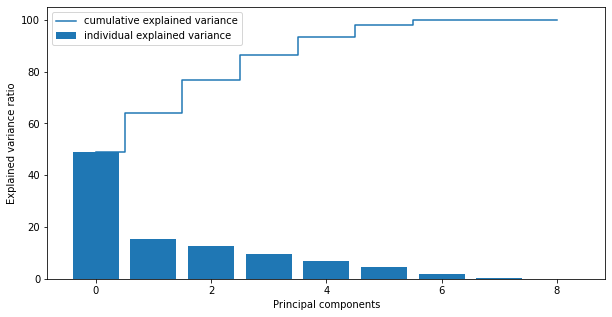

In [58]:
plt.figure(figsize=(10, 5))
plt.bar(range(9), var_exp, label='individual explained variance')

plt.step(range(9), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')

The first principle component contributes around 50%.

First two contributes around 65%.

And first three contributes around 78% to the happiness index

In [59]:
pca = PCA(n_components=4)
x_4d = pca.fit_transform(X_std)
print(x_4d)

[[-4.20944712e+00  2.49622918e+00  2.21127462e-01  4.16033572e-01]
 [-3.48064333e+00  4.17094567e-01 -1.24447927e+00  8.93064925e-01]
 [-3.41905520e+00  8.84391854e-01 -1.82538067e+00  3.09658794e-01]
 [-3.64592016e+00  2.34159351e+00  1.56278088e-01 -1.50947812e+00]
 [-3.41118558e+00  1.47354860e+00  1.28513488e-01  1.73281717e-01]
 [-2.71058455e+00  2.78342537e-01 -7.84344294e-01  8.06828909e-01]
 [-2.66658642e+00  2.96129625e-01 -1.79211789e+00 -2.64224330e-01]
 [-3.09956915e+00 -9.79012662e-01 -1.00203539e+00  4.26036657e-01]
 [-2.88158268e+00 -4.56164207e-01 -1.42863023e+00  2.58915587e-01]
 [-2.53605452e+00  2.53352725e-01 -2.04742117e+00 -7.92728359e-01]
 [-2.87849932e+00  2.71832015e+00  1.84640420e+00  5.68268974e-01]
 [-2.82570163e+00  1.42189122e+00 -3.97083119e-01 -1.43688059e+00]
 [-2.01826343e+00  9.96874823e-01 -2.07488259e+00  9.78068837e-01]
 [-2.66670874e+00  2.49814748e-01 -5.95857019e-01  4.48647149e-01]
 [-2.96529843e+00  5.47920504e-01  6.31060565e-02 -1.73368278e

In [60]:
w = np.hstack((eig_pairs[0][1][:, np.newaxis], eig_pairs[1][1][:, np.newaxis]))
print('Projection Matrix W:\n', w)

Projection Matrix W:
 [[-0.46806221 -0.07177233]
 [-0.41469216  0.20920416]
 [-0.37665651  0.07366935]
 [-0.40037954  0.14011691]
 [-0.23656405 -0.50702305]
 [ 0.05452483 -0.58617962]
 [-0.02955903 -0.56502032]
 [-0.17618678 -0.063435  ]
 [ 0.46467543  0.04551444]]


In [61]:
X_pca = X_std.dot(w)
print(X_pca)

[[-4.20944712 -2.49622918]
 [-3.48064333 -0.41709457]
 [-3.4190552  -0.88439185]
 [-3.64592016 -2.34159351]
 [-3.41118558 -1.4735486 ]
 [-2.71058455 -0.27834254]
 [-2.66658642 -0.29612962]
 [-3.09956915  0.97901266]
 [-2.88158268  0.45616421]
 [-2.53605452 -0.25335273]
 [-2.87849932 -2.71832015]
 [-2.82570163 -1.42189122]
 [-2.01826343 -0.99687482]
 [-2.66670874 -0.24981475]
 [-2.96529843 -0.5479205 ]
 [-2.25047699 -1.55242131]
 [-2.58791184  0.49324294]
 [-2.90624551  0.6460711 ]
 [-2.23923773  0.38911581]
 [-2.04310023  0.09763554]
 [-2.2950426  -1.54764593]
 [-2.17839384  1.692871  ]
 [-1.71565437 -0.54237212]
 [-1.52276526 -1.30440043]
 [-1.81473346 -0.56239988]
 [-1.53679716  0.23616727]
 [-2.18591549  0.39643018]
 [-2.08631733  1.79273937]
 [-1.85798333  1.55779631]
 [-1.17165891 -1.07213446]
 [-2.48677078 -0.33509132]
 [-1.75410822  2.56612344]
 [-1.22045958  0.47622308]
 [-1.60879976  0.87307955]
 [-1.64197276  1.18191687]
 [-0.82991574  1.19884991]
 [-1.5119711   1.21940548]
 

In [62]:
print(pca.explained_variance_ratio_)

[0.48887039 0.15204235 0.12779935 0.09519702]


Here we get to know the exact contribution of each principle component to the happiness index

In [63]:
print("Covarience Matrix of components of PCA")
print(np.cov(x_4d.T))

Covarience Matrix of components of PCA
[[ 4.43475280e+00  8.84599382e-17  1.46942709e-17  2.04148421e-17]
 [ 8.84599382e-17  1.37924136e+00 -7.75827099e-16 -2.98964337e-16]
 [ 1.46942709e-17 -7.75827099e-16  1.15932271e+00 -1.77461078e-16]
 [ 2.04148421e-17 -2.98964337e-16 -1.77461078e-16  8.63572939e-01]]


In [64]:
print(pca.explained_variance_)

[4.4347528  1.37924136 1.15932271 0.86357294]


In [65]:
print(abs( pca.components_ ))

[[0.46806221 0.41469216 0.37665651 0.40037954 0.23656405 0.05452483
  0.02955903 0.17618678 0.46467543]
 [0.07177233 0.20920416 0.07366935 0.14011691 0.50702305 0.58617962
  0.56502032 0.063435   0.04551444]
 [0.12457008 0.23893824 0.22846519 0.24620311 0.03435703 0.27021411
  0.00888665 0.84740947 0.14899881]
 [0.07106597 0.10343254 0.02512715 0.00107776 0.0769186  0.60299771
  0.7671716  0.14487786 0.06748504]]


In [66]:
#Jeevan's Biplot function
def biplot_j(score, coeff , y):
    xs = score[:,0] # projection on PC1
    ys = score[:,1] # projection on PC2
    n = coeff.shape[0] # number of variables
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) 
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)

    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

In [67]:
#mpl.rcParams.update(mpl.rcParamsDefault) 
#biplot_j(x_4d[:,0:2], np.transpose(pca.components_[0:2, :]), y)
#plt.show()

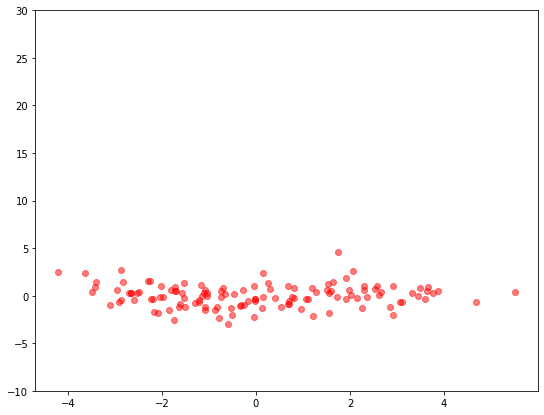

In [68]:
plt.figure(figsize=(9,7))
plt.scatter(x_4d[:,0],x_4d[:,1], c='red',alpha=0.5)
plt.ylim(-10,30)
plt.show()

Therefore by performing PCA we obtain a linear combination of a non-correlated components which is depected in the graph above

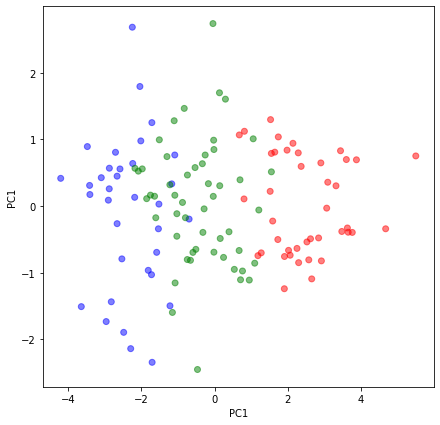

In [69]:

kmeans = KMeans(n_clusters = 3)

X_clustered = kmeans.fit_predict(x_4d)
LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

plt.figure(figsize = (7,7))
plt.scatter(x_4d[:,0],x_4d[:,3], c= label_color, alpha=0.5) 

plt.xlabel("PC1")
plt.ylabel("PC1")
plt.show()


The data is more spread along the x-axis — the first principal component — than the second principal component (y-axis), which is consistent with the explained variance ratio plot that we created previously. However, we can intuitively see that a linear classifier will likely be able to separate the classes well.

In [70]:
#Dhanvin's Biplot function
def biplot(score,coeff,pcax,pcay,labels=None):
    pca1=pcax-1
    pca2=pcay-1
    xs = score[:,pca1]
    ys = score[:,pca2]
    n=score.shape[1]
    scalex = 1.0/(xs.max()- xs.min())
    scaley = 1.0/(ys.max()- ys.min())
    plt.scatter(xs*scalex,ys*scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,pca1], coeff[i,pca2],color='r',alpha=0.5) 
        if labels is None:
            plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15, labels[i], color='g', ha='center', va='center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(pcax))
    plt.ylabel("PC{}".format(pcay))
    plt.grid()

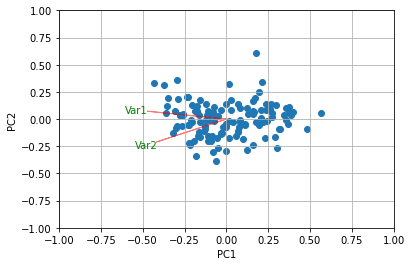

In [71]:
biplot(x_4d[:,0:2],np.transpose(pca.components_[0:2, :]),1,2)

In [72]:
df = pd.DataFrame(x_4d)
df['X_cluster'] = X_clustered
print(df['X_cluster'])

0      2
1      2
2      2
3      2
4      2
      ..
122    0
123    0
124    0
125    0
126    0
Name: X_cluster, Length: 127, dtype: int32


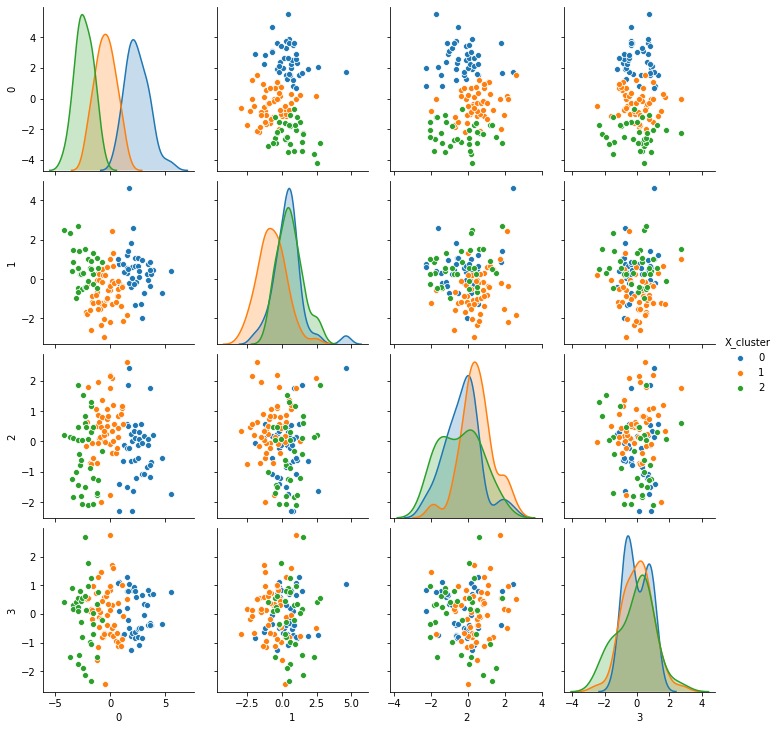

In [73]:
sns.pairplot(df, hue='X_cluster')

From the above pair plots we observe correlation between the features which implies that features like GDP per capita, family/social interaction and life expectency belongs to the first principle components and rest features belong to the others 
First principle components are the mejority contributors for the happiness score

New Zealand, Australia, Norway, Denmark, etc in the right side of the graphs are close to each other, meaning that they show similar caracteristics in the variables we studies.. We could almost say that they kind of build a cluster of happy countries with high GDP per capita, high life expectancy,
countries like   Turkey, Greece and Spain seem to build another cluster
the more we are on the right side of the first dimension, the highest is the Happiness score, the GDP per capita and the Health/ Life expectancy and the Family variables. The more high a country is on the second dimensional axis, the less corruption is in his country.

# Working on 2018 dataset

<Figure size 432x288 with 0 Axes>

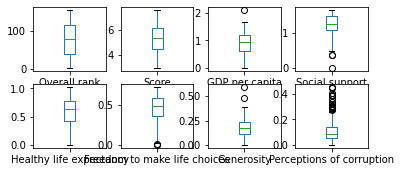

In [74]:
plt.clf()
df18.plot(kind='box',subplots=True,layout=(3,4),sharex =False,sharey=False)
plt.show()

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')


[]

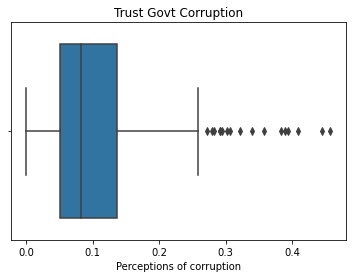

In [75]:
print(df18.columns)
plt.title("Trust Govt Corruption")
sns.boxplot(x=df18['Perceptions of corruption'])
plt.plot()

In [76]:
print(df18.shape)
q1 = df18['Perceptions of corruption'].quantile(0.25)
q3 = df18['Perceptions of corruption'].quantile(0.75)
IQR = q3-q1
ll = q1-1.5*IQR
ul  =q3+1.5*IQR

(156, 9)


In [77]:
df18.drop(df18[df18['Perceptions of corruption'] < ll].index, inplace = True)
df18.drop(df18[df18['Perceptions of corruption'] > ul].index, inplace = True)
print(df18.shape)

(139, 9)


In [78]:
print(df18.isna().sum())
df18.dropna(axis=0,inplace=True)

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       1
dtype: int64


<Figure size 432x288 with 0 Axes>

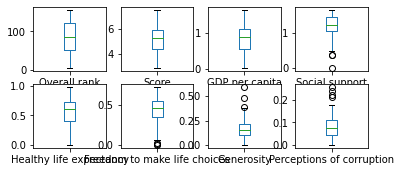

In [79]:
plt.clf()
df18.plot(kind='box',subplots=True,layout=(3,4),sharex =False,sharey=False)
plt.show()

In [80]:
df18 = df18.reset_index()
df18.drop(['Overall rank'],axis=1,inplace=True)
keys = list(range(1,df18.shape[0]+1))
df18['Overall rank'] = keys
df18.drop(['index'], axis = 1,inplace=True)

In [81]:
df18.head()

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Overall rank
0,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,1
1,United Kingdom,7.190,1.244,1.433,0.888,0.464,0.262,0.082,2
2,Austria,7.139,1.341,1.504,0.891,0.617,0.242,0.224,3
3,Costa Rica,7.072,1.010,1.459,0.817,0.632,0.143,0.101,4
4,Belgium,6.927,1.324,1.483,0.894,0.583,0.188,0.240,5


# Working on 2016 Dataset

<Figure size 432x288 with 0 Axes>

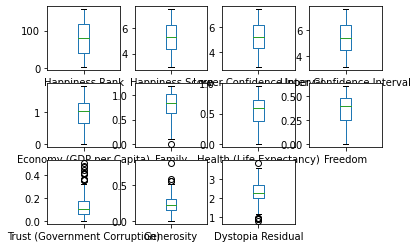

In [82]:
plt.clf()
df16.plot(kind='box',subplots=True,layout=(3,4),sharex =False,sharey=False)
plt.show()

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')


[]

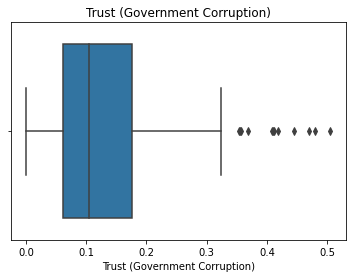

In [83]:
print(df16.columns)
plt.title("Trust (Government Corruption)")
sns.boxplot(x=df16['Trust (Government Corruption)'])
plt.plot()

In [84]:
print(df16.shape)
q1 = df16['Trust (Government Corruption)'].quantile(0.25)
q3 = df16['Trust (Government Corruption)'].quantile(0.75)
IQR = q3-q1
ll = q1-1.5*IQR
ul  =q3+1.5*IQR

(157, 13)


In [85]:
df16.drop(df16[df16['Trust (Government Corruption)'] < ll].index, inplace = True)
df16.drop(df16[df16['Trust (Government Corruption)'] > ul].index, inplace = True)
print(df16.shape)

(145, 13)


<Figure size 432x288 with 0 Axes>

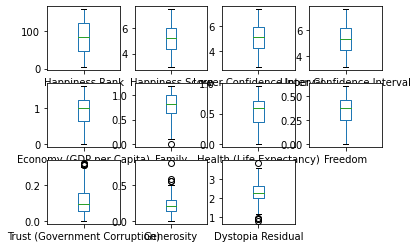

In [86]:
plt.clf()
df16.plot(kind='box',subplots=True,layout=(3,4),sharex =False,sharey=False)
plt.show()

In [87]:
df16.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
5,Canada,North America,6,7.404,7.335,7.473,1.44015,1.09610,0.82760,0.57370,0.31329,0.44834,2.70485
6,Netherlands,Western Europe,7,7.339,7.284,7.394,1.46468,1.02912,0.81231,0.55211,0.29927,0.47416,2.70749
8,Australia,Australia and New Zealand,9,7.313,7.241,7.385,1.44443,1.10476,0.85120,0.56837,0.32331,0.47407,2.54650
10,Israel,Middle East and Northern Africa,11,7.267,7.199,7.335,1.33766,0.99537,0.84917,0.36432,0.08728,0.32288,3.31029


In [88]:
df16 = df16.reset_index()
df16.drop(['Happiness Rank',"Lower Confidence Interval","Upper Confidence Interval"],axis=1,inplace=True)
keys = list(range(1,df16.shape[0]+1))
df16['Happiness Rank'] = keys
df16.drop(['index'], axis = 1,inplace=True)

In [89]:
df16.head()

,Country,Region,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Rank
0,Iceland,Western Europe,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,1
1,Canada,North America,7.404,1.44015,1.09610,0.82760,0.57370,0.31329,0.44834,2.70485,2
2,Netherlands,Western Europe,7.339,1.46468,1.02912,0.81231,0.55211,0.29927,0.47416,2.70749,3
3,Australia,Australia and New Zealand,7.313,1.44443,1.10476,0.85120,0.56837,0.32331,0.47407,2.54650,4
4,Israel,Middle East and Northern Africa,7.267,1.33766,0.99537,0.84917,0.36432,0.08728,0.32288,3.31029,5


# Merging Datasets

In [90]:
df16.drop(['Region'],axis=1,inplace=True)
print(df16.columns)
print(df16.shape)
df16['Year'] = [2016 for i in range(df16.shape[0])]
df16.columns

Index(['Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'Happiness Rank'],
      dtype='object')
(145, 10)


Index(['Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'Happiness Rank', 'Year'],
      dtype='object')

In [91]:
print(df17.columns)
print(df17.shape)
df17.rename(columns={'Happiness.Score':'Happiness Score', 'Economy..GDP.per.Capita.':'Economy (GDP per Capita)',
       'Health..Life.Expectancy.':'Health (Life Expectancy)',
       'Trust..Government.Corruption.':'Trust (Government Corruption)', 'Dystopia.Residual':'Dystopia Residual', 'Happiness.Rank':'Happiness Rank'},inplace=True)
df17['Year'] = [2017 for i in range(df17.shape[0])]
print(df17.columns)

Index(['Country', 'Happiness.Score', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual', 'Happiness.Rank'],
      dtype='object')
(127, 10)
Index(['Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Generosity',
       'Trust (Government Corruption)', 'Dystopia Residual', 'Happiness Rank',
       'Year'],
      dtype='object')


In [92]:
print(df18.columns)
print(df18.shape)
df18.rename(columns={'Country or region':'Country', 'Score':'Happiness Score', 'GDP per capita':'Economy (GDP per Capita)', 'Social support':'Family',
       'Healthy life expectancy':'Health (Life Expectancy)', 'Freedom to make life choices':'Freedom',
       'Perceptions of corruption':'Trust (Government Corruption)', 'Overall rank':'Happiness Rank'},inplace=True)
df18['Year'] = [2018 for i in range(df18.shape[0])]
print(df18.columns)

Index(['Country or region', 'Score', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Overall rank'],
      dtype='object')
(138, 9)
Index(['Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Generosity',
       'Trust (Government Corruption)', 'Happiness Rank', 'Year'],
      dtype='object')


In [93]:
print(df19.columns)
print(df19.shape)
df19.rename(columns={'Country or region':'Country', 'Score':'Happiness Score', 'GDP per capita':'Economy (GDP per Capita)', 'Social support':'Family',
       'Healthy life expectancy':'Health (Life Expectancy)', 'Freedom to make life choices':'Freedom',
       'Perceptions of corruption':'Trust (Government Corruption)', 'Overall rank':'Happiness Rank'},inplace=True)
df19['Year'] = [2019 for i in range(df19.shape[0])]
print(df19.columns)

Index(['Country or region', 'Score', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Overall rank'],
      dtype='object')
(142, 9)
Index(['Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Generosity',
       'Trust (Government Corruption)', 'Happiness Rank', 'Year'],
      dtype='object')


In [94]:
df = pd.concat([df16,df17,df18,df19],axis= 0)
df.sort_values(by=['Country','Year'], axis=0, ascending=True, inplace=True)
df.reset_index(inplace=True)
df.drop(['index',"Dystopia Residual"],inplace=True,axis=1)

In [95]:
print("Shape",df.shape)
print(df.columns)
df.head(20)

Shape (552, 10)
Index(['Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Happiness Rank', 'Year'],
      dtype='object')


,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Happiness Rank,Year
0,Afghanistan,3.360,0.382270,0.110370,0.173440,0.164300,0.071120,0.312680,142,2016
1,Afghanistan,3.794,0.401477,0.581543,0.180747,0.106180,0.061158,0.311871,116,2017
2,Afghanistan,3.632,0.332000,0.537000,0.255000,0.085000,0.036000,0.191000,128,2018
3,Afghanistan,3.203,0.350000,0.517000,0.361000,0.000000,0.025000,0.158000,140,2019
4,Albania,4.655,0.955300,0.501630,0.730070,0.318660,0.053010,0.168400,98,2016
5,Albania,4.644,0.996193,0.803685,0.731160,0.381499,0.039864,0.201313,86,2017
6,Albania,4.586,0.916000,0.817000,0.790000,0.419000,0.032000,0.149000,95,2018
7,Albania,4.719,0.947000,0.848000,0.874000,0.383000,0.027000,0.178000,94,2019
8,Algeria,6.355,1.052660,0.833090,0.618040,0.210060,0.161570,0.070440,28,2016
9,Algeria,5.872,1.091864,1.146217,0.617585,0.233336,0.146096,0.069437,33,2017


In [96]:
print("Total number of countries in the dataset: ")
print(df.groupby('Country').size())

Total number of countries in the dataset: 
Country
Afghanistan    4
Albania        4
Algeria        4
Angola         3
Argentina      4
              ..
Venezuela      4
Vietnam        4
Yemen          4
Zambia         4
Zimbabwe       4
Length: 156, dtype: int64


# Visualization

 We have tried to find the best fit curve using scatter plot for different components. 
 We have tried curve fitting using different polynomial, logarithmic and exponential functions

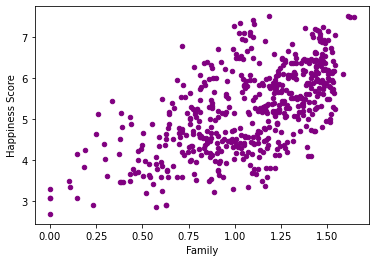

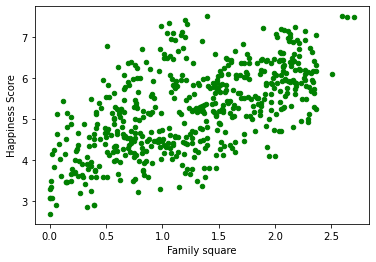

In [97]:
df2= df
df2.plot.scatter(x="Family", y = "Happiness Score",color="purple")
df2['Family square'] = df2["Family"]**2
df2.plot.scatter(x="Family square", y = "Happiness Score", color = "green")

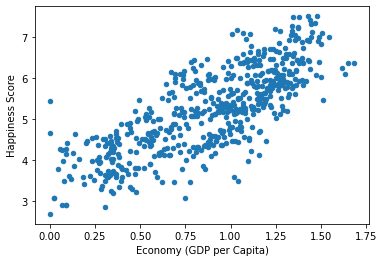

In [98]:
df2.plot.scatter(x="Economy (GDP per Capita)", y = "Happiness Score")

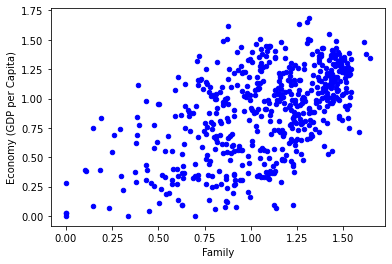

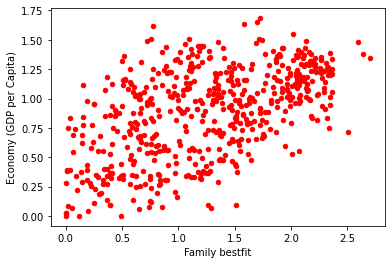

In [99]:
df2.plot.scatter(x="Family", y = "Economy (GDP per Capita)",color="blue")
df2['Family bestfit'] = df2["Family"]**2
df2.plot.scatter(x="Family bestfit", y = "Economy (GDP per Capita)", color = "red")

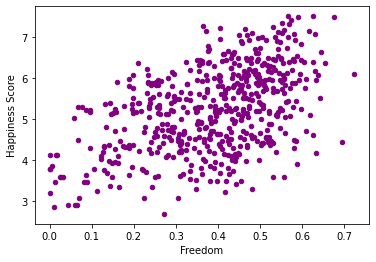

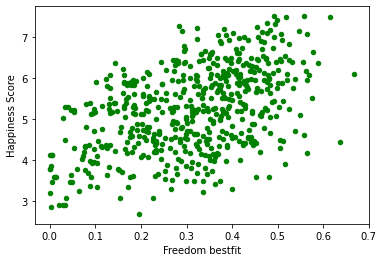

In [100]:
df2.plot.scatter(x="Freedom", y = "Happiness Score",color="purple")
df2['Freedom bestfit'] = df2["Freedom"]**1.25
df2.plot.scatter(x="Freedom bestfit", y = "Happiness Score", color = "green")

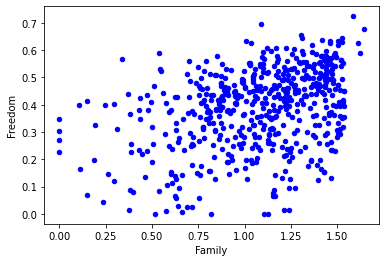

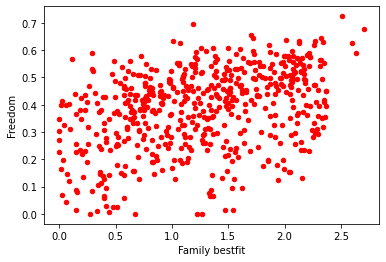

In [101]:
df2.plot.scatter(x="Family", y = "Freedom",color="blue")
df2['Family bestfit'] = df2["Family"]**2
df2.plot.scatter(x="Family bestfit", y = "Freedom", color = "red")

# Multiple Regression Model

We have used support vector regression over linear regression and KNN to predict the happiness score using other parameters

While linear regression models minimize the error between the actual and predicted values through the line of best fit, SVR manages to fit the best line within a threshold of values


SVM is less computationally demanding than kNN and is easier to interpret but can identify only a limited set of patterns

In [102]:
dft = pd.concat([df16,df17,df18],axis= 0)
dft.sort_values(by=['Country','Year'], axis=0, ascending=True, inplace=True)
dft.reset_index(inplace=True)
dft.drop(['index',"Dystopia Residual"],inplace=True,axis=1)
dft['Family square'] = dft["Family"]**2
dft['Freedom bestfit'] = dft["Freedom"]**1.25
df_train = dft

In [103]:
dfte = df19
dfte.sort_values(by=['Country','Year'], axis=0, ascending=True, inplace=True)
dfte['Family square'] = dfte["Family"]**2
dfte['Freedom bestfit'] = dfte["Freedom"]**1.25
df_test = dfte

We have used 3 years dataset, which is 2016,2017 and 2018 as training dataset
And 2019 dataset is used for testing

In [104]:
X_test = df_test[['Economy (GDP per Capita)',
       'Health (Life Expectancy)', 'Trust (Government Corruption)',
       'Generosity', 'Happiness Rank', 'Year', 'Family square',
       'Freedom bestfit']]
y_test = df_test['Happiness Score']

X_train = df_train[['Economy (GDP per Capita)', 
       'Health (Life Expectancy)', 'Trust (Government Corruption)',
       'Generosity', 'Happiness Rank', 'Year', 'Family square',
       'Freedom bestfit']]
y_train = df_train['Happiness Score']

In [105]:
column_t = 'Happiness Score'
df_train[column_t] = MinMaxScaler().fit_transform(np.array(df_train[column_t]).reshape(-1,1))

column_te = 'Happiness Score'
df_test[column_te] = MinMaxScaler().fit_transform(np.array(df_test[column_te]).reshape(-1,1))

In [106]:
y_train = df_train['Happiness Score']
y_test = df_test['Happiness Score']

regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
y_pred

array([0.29807769, 0.44070687, 0.49972997, 0.62398302, 0.41277333,
       0.726291  , 0.49351858, 0.65501406, 0.38483825, 0.52149522,
       0.71081184, 0.45620135, 0.47798883, 0.58049399, 0.53079864,
       0.31359106, 0.6674122 , 0.4717965 , 0.41585788, 0.32282652,
       0.43449745, 0.47485239, 0.29496866, 0.36311244, 0.68601329,
       0.48420077, 0.63639193, 0.33213043, 0.45311377, 0.37862549,
       0.72318436, 0.53702111, 0.61777   , 0.70461305, 0.53391791,
       0.61465995, 0.34764741, 0.66119414, 0.59915786, 0.35692869,
       0.69222355, 0.45003405, 0.40033819, 0.4034504 , 0.71390613,
       0.46864268, 0.51837656, 0.68289829, 0.40654045, 0.31664806,
       0.58670501, 0.57740954, 0.72939589, 0.33834008, 0.48730516,
       0.40966773, 0.3817468 , 0.72009549, 0.65812146, 0.4655299 ,
       0.5960388 , 0.58984069, 0.45935126, 0.58362602, 0.39724476,
       0.62706889, 0.61156969, 0.50594832, 0.44691618, 0.60535993,
       0.49041433, 0.32595514, 0.33522845, 0.54633737, 0.63950

In [107]:
df_temp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_temp

,Actual,Predicted
139,0.075415,0.298078
93,0.402069,0.440707
74,0.508080,0.499730
34,0.696617,0.623983
102,0.367593,0.412773
...,...,...
94,0.399483,0.437627
80,0.500323,0.481098
137,0.113553,0.304288
124,0.270200,0.344540


In [108]:
r2_score(y_test, y_pred)

0.8185396506630687

We have got pretty good accurecy of 81.85% for this model with very less Mean squred error, i.e <0.1 

In [109]:
MSE = mean_squared_error(y_test, y_pred)
RMSE = math.sqrt(MSE)
RMSE

0.09140849175682789

# Top 5 countries based on GDP and Trust

In [110]:
df_top = df17
df_top['Combined_score'] = 0.488*df_top['Economy (GDP per Capita)'] + 0.0734 * df_top['Trust (Government Corruption)']

In [111]:
df_top.sort_values(by=['Combined_score','Happiness Score'], axis=0, ascending=False, inplace=False).head()

,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,Happiness Rank,Year,Combined_score
20,Kuwait,6.105,1.632952,1.259699,0.632106,0.496338,0.228290,0.215160,1.640425,21,2017,0.812674
4,United States,6.993,1.546259,1.419921,0.774287,0.505741,0.392579,0.135639,2.218113,5,2017,0.764530
3,Austria,7.006,1.487097,1.459945,0.815328,0.567766,0.316472,0.221060,2.138506,4,2017,0.741929
0,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,1,2017,0.733818
14,France,6.442,1.430923,1.387777,0.844466,0.470222,0.129762,0.172502,2.005955,15,2017,0.710952


# Happiness Index over 3 years

In [112]:
df = pd.concat([df17,df18,df16],axis= 0)
df.sort_values(by=['Country','Year'], axis=0, ascending=True, inplace=True)
df.reset_index(inplace=True)
df.drop(['index',"Dystopia Residual","Combined_score"],inplace=True,axis=1)

In [113]:
df.sort_values(by=['Country','Happiness Score'], axis=0, ascending=True, inplace=True)
df.head(30)

,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Happiness Rank,Year
0,Afghanistan,3.360,0.382270,0.110370,0.173440,0.164300,0.312680,0.071120,142,2016
2,Afghanistan,3.632,0.332000,0.537000,0.255000,0.085000,0.191000,0.036000,128,2018
1,Afghanistan,3.794,0.401477,0.581543,0.180747,0.106180,0.311871,0.061158,116,2017
5,Albania,4.586,0.916000,0.817000,0.790000,0.419000,0.149000,0.032000,95,2018
4,Albania,4.644,0.996193,0.803685,0.731160,0.381499,0.201313,0.039864,86,2017
3,Albania,4.655,0.955300,0.501630,0.730070,0.318660,0.168400,0.053010,98,2016
8,Algeria,5.295,0.979000,1.154000,0.687000,0.077000,0.055000,0.135000,68,2018
7,Algeria,5.872,1.091864,1.146217,0.617585,0.233336,0.069437,0.146096,33,2017
6,Algeria,6.355,1.052660,0.833090,0.618040,0.210060,0.070440,0.161570,28,2016
11,Angola,3.795,0.730000,1.125000,0.269000,0.000000,0.079000,0.061000,125,2018


In [114]:
print(df.groupby('Country').size())

Country
Afghanistan    3
Albania        3
Algeria        3
Angola         3
Argentina      3
              ..
Venezuela      3
Vietnam        3
Yemen          3
Zambia         3
Zimbabwe       3
Length: 152, dtype: int64


In [115]:
df.shape

(410, 10)

In [116]:
temp = ""
first = 0
last = 0
diff  = 0
l = []
for i in range(df.shape[0]):
    if temp!=df['Country'][i] and temp!="":
        diff = last-first
        l.append((temp,diff))
        temp = df['Country'][i]
        first = df['Happiness Score'][i]
    elif temp=="":
        temp = df['Country'][i]
        first = df['Happiness Score'][i]
    last =  df['Happiness Score'][i]

In [117]:
l  = list(filter(lambda x:x[1]==0 , l))
for i in l:
    print(i[0])

Australia
Belize
Burundi
Canada
Comoros
Germany
Hong Kong
Ireland
Netherlands
Northern Cyprus
Puerto Rico
Qatar
Somalia
Sudan
Suriname
Taiwan Province of China
Trinidad & Tobago


The above are the list of countries with least variation in happiness score over the years

# Most Varying factor over the years

In [118]:
df16.columns
df16.drop(['Dystopia Residual'],axis= 1, inplace = True)
df16.drop(['Country','Happiness Score','Happiness Rank','Year'],axis= 1, inplace = True)
df16.columns

Index(['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity'],
      dtype='object')

In [119]:
df0 = df17.copy()
df17.columns
df17.drop(['Dystopia Residual','Combined_score'],axis= 1, inplace = True)
df17.drop(['Country','Happiness Score','Happiness Rank','Year'],axis= 1, inplace = True)
df17.columns

Index(['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Generosity', 'Trust (Government Corruption)'],
      dtype='object')

In [120]:
df18.columns
df18.drop(['Country','Happiness Score','Happiness Rank','Year'],axis= 1, inplace = True)

In [121]:
l16 = list(df16.mean())
print(l16)

[0.9218567586206898, 0.7774809655172418, 0.5429637241379307, 0.3562099310344827, 0.11463758620689662, 0.2344679310344828]


In [122]:
l17 = list(df17.mean())
print(l17)

[0.9119911877893089, 1.1549081816447997, 0.5201353264356575, 0.3763068811087979, 0.22859833793582646, 0.08489961156210912]


In [123]:
l18 = list(df18.mean())
print(l18)

[0.8395144927536232, 1.1883768115942033, 0.5684347826086956, 0.43342753623188385, 0.16871739130434785, 0.08368840579710146]


In [124]:
df17.columns

Index(['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Generosity', 'Trust (Government Corruption)'],
      dtype='object')

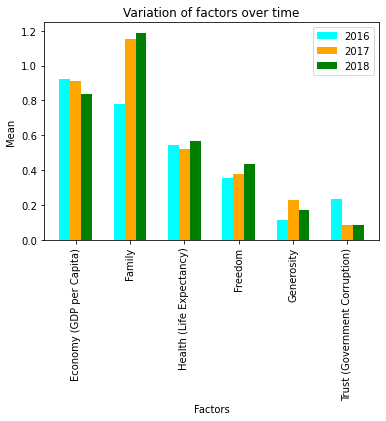

In [125]:
x = np.arange(6)
y1 = l16
y2 = l17
y3 = l18
width = 0.2
plt.bar(x-0.2, y1, width, color='cyan')
plt.bar(x, y2, width, color='orange')
plt.bar(x+0.2, y3, width, color='green')
plt.xticks(x, list(df17.columns))
plt.xlabel("Factors")
plt.xticks(rotation=90)
plt.title("Variation of factors over time")
plt.ylabel("Mean ")
plt.legend(["2016", "2017", "2018"])
plt.show()

From the above graph. we can conclude that factors like GDP , Health as well as freedom have least variation over a period of time

Family/Social support, corruption and generocity has varied by large values over time

# World Heat map for Happiness score

In [126]:
init_notebook_mode(connected=True)
data2 = dict(type = 'choropleth', 
           locations = df0['Country'],
           locationmode = 'country names',
           z = df0['Happiness Score'], 
           text = df0['Country'],
           colorbar = {'title':'Happiness'})
layout = dict(title = 'Happiness Score Across the World', 
             geo = dict(showframe = False, 
                       projection = {'type': 'Mercator'}))
choromap3 = go.Figure(data = [data2], layout=layout)
iplot(choromap3)

This gives the heat map of the world happiness based on the countries provided in the dataset

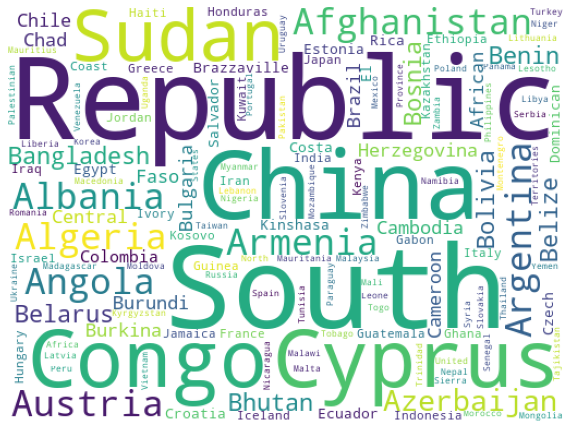

In [127]:

x2015 = df.Country[df.Year == 2017]
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(
                          background_color='white',
                          width=512,
                          height=384
                         ).generate(" ".join(x2015))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
